<a href="https://colab.research.google.com/github/Priya123346/CodTech_task2/blob/main/Copy_of_CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
credit_card_data=pd.read_csv('creditcard.csv')

<ipython-input-2-8ffb65c2281e>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_card_data=pd.read_csv('creditcard.csv')


In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

In [5]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
count,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,33760.000000,...,33760.000000,33760.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000,33759.000000
mean,23186.502044,-0.210769,0.090212,0.718086,0.205183,-0.215343,0.092961,-0.118041,0.031774,0.285485,...,0.044957,-0.031917,-0.042490,0.008641,0.135181,0.021953,0.012227,0.003599,83.034366,0.003051
std,12310.554703,1.849230,1.545474,1.565917,1.413512,1.397150,1.312452,1.270591,1.257190,1.243503,...,0.671623,0.778003,0.544158,0.591997,0.435728,0.507048,0.388694,0.303696,227.868983,0.055153
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-13.694584,-20.262054,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,11323.250000,-0.957639,-0.480557,0.248743,-0.705571,-0.813268,-0.646448,-0.598428,-0.156904,-0.504769,...,-0.160852,-0.241145,-0.177751,-0.325370,-0.128167,-0.331954,-0.062816,-0.007200,6.905000,0.000000
50%,28260.500000,-0.240862,0.125560,0.834797,0.194608,-0.251247,-0.165186,-0.072077,0.041389,0.164850,...,-0.022156,-0.084376,-0.051504,0.062636,0.174733,-0.061390,0.009070,0.021002,21.000000,0.000000
75%,33557.250000,1.162820,0.767388,1.460421,1.089341,0.303673,0.479350,0.439445,0.303476,1.025500,...,0.165501,0.091394,0.075396,0.398457,0.420014,0.301171,0.088390,0.076330,75.000000,0.000000
max,37373.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,17.281859,22.614889,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


data cleaning

In [6]:
credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [41]:
import pandas as pd
import numpy as np

# Assuming 'credit_card_data' is your DataFrame
# Replace '-' with NaN and convert relevant columns to numeric type
credit_card_data = credit_card_data.replace('-', np.nan)  # Replace hyphens with NaN
for col in credit_card_data.columns:
    if credit_card_data[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            credit_card_data[col] = pd.to_numeric(credit_card_data[col])  # Attempt conversion to numeric
        except:
            pass  # Skip if conversion fails (likely non-numeric columns)

credit_card_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.017814,-0.107510,-0.065887,-0.033534,-0.075493,-0.019784,-0.010849,0.039417,-0.328330,...,0.023987,0.052342,-0.011084,-0.013278,0.056925,-0.035307,-0.003964,-0.000971,0.069997,-0.012079
V1,0.017814,1.000000,-0.133990,0.312936,-0.104746,0.098156,0.107063,0.182606,-0.098015,-0.030383,...,-0.066832,-0.000349,-0.050639,-0.009858,0.183771,0.025017,-0.143281,0.189871,-0.214837,-0.225919
V2,-0.107510,-0.133990,1.000000,-0.249494,0.120274,-0.133256,-0.021008,-0.055904,0.068821,-0.016402,...,0.032864,-0.103572,-0.002019,-0.023471,-0.095659,-0.049774,0.055877,0.047638,-0.500774,0.205768
V3,-0.065887,0.312936,-0.249494,1.000000,-0.154718,0.312557,0.007996,0.360337,-0.292935,0.167499,...,-0.000006,0.239063,0.056617,0.030216,-0.188387,0.061514,-0.181277,0.071175,-0.166588,-0.412469
V4,-0.033534,-0.104746,0.120274,-0.154718,1.000000,-0.075052,-0.044163,-0.110838,0.095150,-0.030745,...,-0.000956,-0.008589,-0.010681,-0.016966,-0.015852,0.028176,0.066231,-0.036025,0.096631,0.223332
V5,-0.075493,0.098156,-0.133256,0.312557,-0.075052,1.000000,0.093215,0.074518,-0.120031,0.043633,...,-0.053308,-0.073301,0.028322,-0.007450,-0.052389,-0.046990,-0.126481,0.015301,-0.373715,-0.207427
V6,-0.019784,0.107063,-0.021008,0.007996,-0.044163,0.093215,1.000000,0.102181,-0.065910,0.050325,...,0.044925,0.015185,-0.012064,0.018668,0.059581,0.013457,-0.021567,-0.022680,0.213699,-0.101126
V7,-0.010849,0.182606,-0.055904,0.360337,-0.110838,0.074518,0.102181,1.000000,-0.138621,0.047514,...,-0.075329,0.008973,0.068886,-0.000698,-0.121858,-0.041180,-0.150365,-0.057180,0.337312,-0.331990
V8,0.039417,-0.098015,0.068821,-0.292935,0.095150,-0.120031,-0.065910,-0.138621,1.000000,-0.068518,...,-0.128989,0.050736,-0.056567,0.004776,0.036720,-0.001699,0.056503,0.078879,-0.074457,0.168806
V9,-0.328330,-0.030383,-0.016402,0.167499,-0.030745,0.043633,0.050325,0.047514,-0.068518,1.000000,...,-0.024527,0.006304,-0.033252,0.007100,0.095835,0.078917,-0.053929,-0.060042,-0.022678,-0.144466


In [43]:
correlation=credit_card_data.corr()

<Axes: >

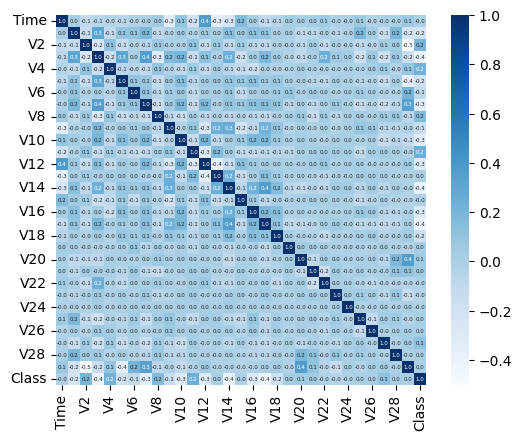

In [50]:
sns.heatmap(correlation,annot=True,cmap='Blues',annot_kws={'size':4},fmt='.1f',cbar=True,square=True,)

In [7]:
credit_card_data['Class'].value_counts()

Class
0.0    33656
1.0      103
Name: count, dtype: int64

In [8]:
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [9]:
legit.shape

(33656, 31)

In [10]:
fraud.shape

(103, 31)

In [13]:
legit.Amount.describe()
# fraud.Amount.describe()

count    33656.000000
mean        83.011607
std        227.811004
min          0.000000
25%          6.990000
50%         21.040000
75%         75.000000
max       7879.420000
Name: Amount, dtype: float64

Undersampling legit ones to fraud


In [16]:
legit_sample=legit.sample(n=103)

In [17]:
new_data=pd.concat([legit_sample,fraud],axis=0)

In [18]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7579,10464,1.250115,0.080181,0.735720,0.148283,-0.666100,-0.950086,-0.225708,-0.292351,1.567296,...,-0.264754,-0.510409,0.082657,0.402666,0.112913,0.861586,-0.096323,0.007914,21.43,0.0
27548,34594,-1.337581,-0.804091,0.589593,-1.247888,3.753700,2.882738,-0.470550,0.874731,0.068527,...,-0.227152,-0.918931,0.009577,0.999350,0.227864,0.006636,-0.166175,-0.112406,7.78,0.0
29716,35599,-0.916628,-5.063088,-1.200802,-0.240875,-2.773789,-0.446686,0.731904,-0.392804,-1.943075,...,0.582655,-0.741921,-1.139302,0.555712,0.101692,-0.219178,-0.233317,0.212236,1250.24,0.0
6987,9130,0.596842,-1.211524,0.707544,-0.670130,-0.485238,1.698287,-0.839038,0.559518,2.761186,...,0.289989,0.986057,-0.196347,-1.004955,0.159546,-0.367682,0.087099,0.039133,221.80,0.0
19983,30701,-0.521451,0.844192,1.871171,0.348807,0.277466,-0.324011,0.769327,-0.114924,-0.465263,...,-0.253527,-0.663111,-0.110195,0.004265,-0.094188,0.232408,-0.127346,-0.141326,17.99,0.0


In [19]:
new_data['Class'].value_counts()

Class
0.0    103
1.0    103
Name: count, dtype: int64

In [21]:
new_data['Class'].value_counts()
# new_data.groupby('Class').mean()

Class
0.0    103
1.0    103
Name: count, dtype: int64

In [22]:
x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

Splitting for training and testing

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [25]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
18773,29753,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.310525,0.371121,-0.32229,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68
29476,35485,1.033530,-0.764360,0.910732,0.137469,-1.178531,0.117423,-0.739022,0.271140,1.149971,...,0.028055,-0.168884,-0.505584,-0.029470,0.046973,0.077038,0.941167,-0.061479,0.012228,89.75
8615,11629,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.00
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.408704,0.716720,-0.44806,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00
6051,6847,0.247668,-1.779577,0.898157,0.845155,-1.804269,-0.434420,-0.125657,-0.186263,2.300514,...,0.880877,0.050361,-0.533227,-0.320473,0.751116,-0.136096,0.879299,-0.153329,0.098732,500.00


In [27]:
logisticRegressor=LogisticRegression()
logisticRegressor.fit(x_train,y_train)
y_pred=logisticRegressor.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0.])

In [39]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [38]:
from sklearn.metrics import r2_score

# Assuming 'y_test' and 'y_pred' are available from previous computations
true_r2_score = r2_score(y_test, y_pred)
print(true_r2_score)

0.8095238095238095


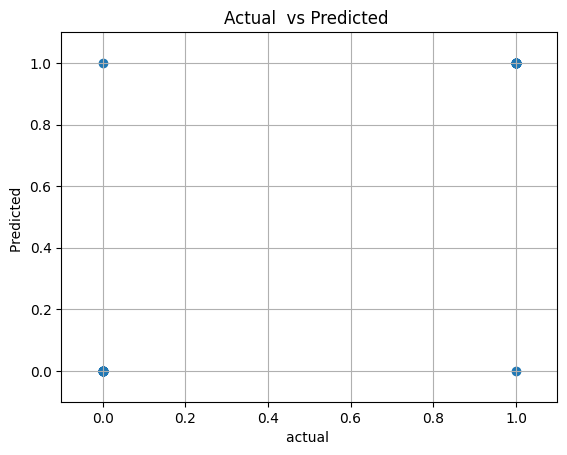

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('Predicted ')
plt.title('Actual  vs Predicted ')
plt.xlim(-0.1, 1.1)  # Set limits for better visualization
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()